In [9]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt

# Cargar el dataset desde el archivo CSV
df = pd.read_csv('./frutas_clasificacion.csv')
df


,area_cm2,perimetro_cm,size,tipo_fruta
0,284,102.810896,grande,melon
1,273,106.323394,pequeño,banana
2,78,45.762065,grande,manzana
3,201,59.424608,mediano,banana
4,168,116.765780,grande,banana
...,...,...,...,...
95,224,72.244038,pequeño,manzana
96,183,28.411826,grande,melon
97,95,117.385807,mediano,pera
98,91,28.031974,pequeño,melon


# New Section

In [10]:

# Convertir la columna 'size' (pequeño, mediano, grande) en valores numéricos
label_encoder = LabelEncoder()
df['size_encoded'] = label_encoder.fit_transform(df['size'])  # 0: grande, 1: mediano, 2: pequeño

# Dividir los datos en características (X) y etiquetas (y)
X = df[['area_cm2', 'perimetro_cm']].values
y = df['size_encoded'].values

# Dividir el dataset en entrenamiento (70%) y pruebas (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Escalar los datos para mejorar el rendimiento del modelo
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
# Modelo 1: Arquitectura básica con 2 capas ocultas (16 y 12 neuronas)
model_1 = Sequential()
model_1.add(Dense(16, input_dim=2, activation='relu'))  # Capa oculta 1
model_1.add(Dense(12, activation='relu'))               # Capa oculta 2
model_1.add(Dense(3, activation='softmax'))             # Capa de salida

# Compilar el modelo
model_1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history_1 = model_1.fit(X_train_scaled, y_train, epochs=50, batch_size=5, validation_split=0.1)

# Evaluar el modelo
y_pred_1 = np.argmax(model_1.predict(X_test_scaled), axis=1)
cm_1 = confusion_matrix(y_test, y_pred_1)
accuracy_1 = accuracy_score(y_test, y_pred_1)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.5663 - loss: 1.0396 - val_accuracy: 0.4286 - val_loss: 1.1380
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4146 - loss: 1.0702 - val_accuracy: 0.4286 - val_loss: 1.1404
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5149 - loss: 1.0306 - val_accuracy: 0.4286 - val_loss: 1.1411
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4832 - loss: 1.0278 - val_accuracy: 0.4286 - val_loss: 1.1401
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5128 - loss: 1.0241 - val_accuracy: 0.4286 - val_loss: 1.1405
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.4604 - loss: 1.0401 - val_accuracy: 0.4286 - val_loss: 1.1393
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5105 - loss: 1.0415 - val_accuracy: 0.4286 - val_loss: 1.1390
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4892 - loss: 1.0663 - val_accuracy: 0.4286 - val_loss: 1.1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


In [18]:
# Modelo 2: Añadir una capa oculta adicional (8 neuronas en la tercera capa oculta)
model_2 = Sequential()
model_2.add(Dense(16, input_dim=2, activation='relu'))  # Capa oculta 1
model_2.add(Dense(12, activation='relu'))               # Capa oculta 2
model_2.add(Dense(8, activation='relu'))                # Capa oculta 3
model_2.add(Dense(3, activation='softmax'))             # Capa de salida

# Compilar el modelo
model_2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history_2 = model_2.fit(X_train_scaled, y_train, epochs=50, batch_size=5, validation_split=0.1)

# Evaluar el modelo
y_pred_2 = np.argmax(model_2.predict(X_test_scaled), axis=1)
cm_2 = confusion_matrix(y_test, y_pred_2)
accuracy_2 = accuracy_score(y_test, y_pred_2)


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.2453 - loss: 1.1693 - val_accuracy: 0.5714 - val_loss: 1.1152
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2551 - loss: 1.1373 - val_accuracy: 0.5714 - val_loss: 1.1139
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3420 - loss: 1.1391 - val_accuracy: 0.4286 - val_loss: 1.1121
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3553 - loss: 1.1190 - val_accuracy: 0.5714 - val_loss: 1.1139
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3924 - loss: 1.1058 - val_accuracy: 0.5714 - val_loss: 1.1167
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4779 - loss: 1.0976 - val_accuracy: 0.4286 - val_loss: 1.1141
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4480 - loss: 1.1030 - val_accuracy: 0.4286 - val_loss: 1.1114
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4919 - loss: 1.0955 - val_accuracy: 0.4286 - val_loss: 1.1121
Ep

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


In [20]:
# Modelo 3: Reducir el número de neuronas y aumentar las épocas
model_3 = Sequential()
model_3.add(Dense(8, input_dim=2, activation='relu'))  # Capa oculta 1
model_3.add(Dense(6, activation='relu'))               # Capa oculta 2
model_3.add(Dense(3, activation='softmax'))            # Capa de salida

# Compilar el modelo
model_3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo con más épocas
history_3 = model_3.fit(X_train_scaled, y_train, epochs=100, batch_size=5, validation_split=0.1)

# Evaluar el modelo
y_pred_3 = np.argmax(model_3.predict(X_test_scaled), axis=1)
cm_3 = confusion_matrix(y_test, y_pred_3)
accuracy_3 = accuracy_score(y_test, y_pred_3)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.2755 - loss: 1.1318 - val_accuracy: 0.4286 - val_loss: 1.1615
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3022 - loss: 1.1136 - val_accuracy: 0.5714 - val_loss: 1.1605
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2192 - loss: 1.1512 - val_accuracy: 0.5714 - val_loss: 1.1585
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2958 - loss: 1.1259 - val_accuracy: 0.5714 - val_loss: 1.1571
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2643 - loss: 1.1184 - val_accuracy: 0.5714 - val_loss: 1.1539
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3593 - loss: 1.1042 - val_accuracy: 0.5714 - val_loss: 1.1506
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4079 - loss: 1.0826 - val_accuracy: 0.5714 - val_loss: 1.1496
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4425 - loss: 1.0816 - val_accuracy: 0.5714 - val_loss: 1.

In [21]:
print("Modelo 1 - Exactitud:", accuracy_1 * 100)
print("Matriz de Confusión:\n", cm_1)

print("Modelo 2 - Exactitud:", accuracy_2 * 100)
print("Matriz de Confusión:\n", cm_2)

print("Modelo 3 - Exactitud:", accuracy_3 * 100)
print("Matriz de Confusión:\n", cm_3)

Modelo 1 - Exactitud: 23.333333333333332
Matriz de Confusión:
 [[3 3 7]
 [4 2 1]
 [7 1 2]]
Modelo 2 - Exactitud: 13.333333333333334
Matriz de Confusión:
 [[3 4 6]
 [6 0 1]
 [7 2 1]]
Modelo 3 - Exactitud: 40.0
Matriz de Confusión:
 [[11  2  0]
 [ 6  1  0]
 [10  0  0]]


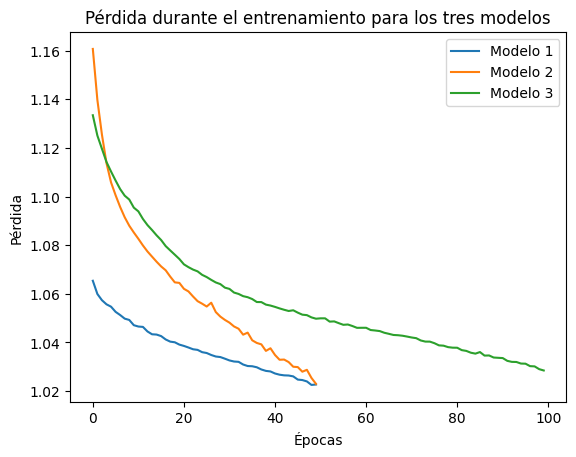

In [22]:
# Graficar la pérdida de los tres modelos
plt.plot(history_1.history['loss'], label='Modelo 1')
plt.plot(history_2.history['loss'], label='Modelo 2')
plt.plot(history_3.history['loss'], label='Modelo 3')
plt.title('Pérdida durante el entrenamiento para los tres modelos')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()